<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/K-Means/KMeans_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering Assignment

**CONTEXT:**

Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.


**OBJECTIVE:**


To segment the shop's customers into distinct groups (clusters) based on their purchasing behaviors and demographics (age, income, profession, family size, etc.) using k-means clustering. This will enable the shop owner to:

* Identify customer segments with similar
characteristics and purchasing patterns.
* Tailor marketing strategies and product offerings to specific customer segments for better engagement.
* Improve customer relationship management by understanding the needs and preferences of each customer group.
* Gain insights into customer behavior and preferences for business decision-making.

**DATA DICTIONARY:**

Dataset consists of 2000 records and 8 columns:

Customer ID

Gender

Age

Annual Income

Spending Score - Score assigned by the shop,
based on customer behavior and spending nature
Profession

Work Experience - in years

Family Size

In [1]:
#Importing all necassary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Loading the dataset

from google.colab import files
uploaded = files.upload()

Saving Customers.csv to Customers.csv


In [3]:
df=pd.read_csv('Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
df.duplicated().sum()         # checking for duplicate values

0

In [7]:
df.isnull().sum()            # checking for missing values

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


**Observation: Profession column has 35 missing values**

In [8]:
# checking summary statistics

df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


**Observation: There may be outliers in the work exoerience column.**

# Handling missing values


In [9]:
df['Profession'].value_counts()

,count
Profession,
Artist,612
Healthcare,339
Entertainment,234
Engineer,179
Doctor,161
Executive,153
Lawyer,142
Marketing,85
Homemaker,60


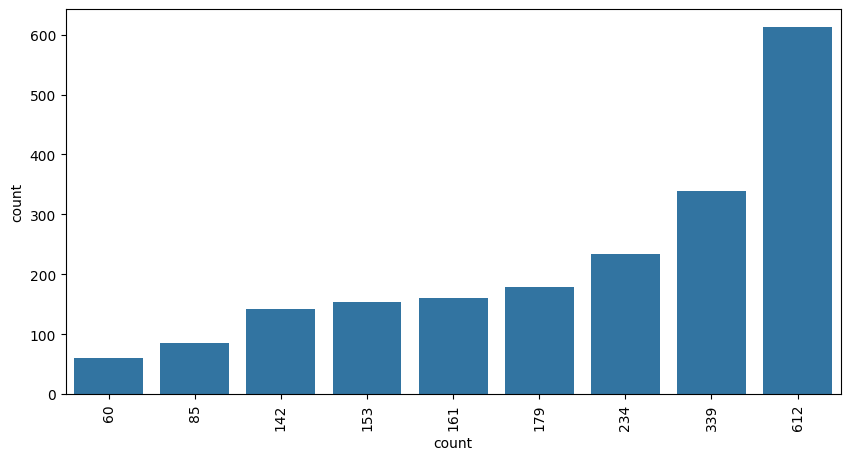

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Profession'].value_counts(),y=df['Profession'].value_counts() )
plt.xticks(rotation=90)
plt.show()

In [11]:
df['Profession'].mode()

,Profession
0,Artist


In [12]:
df['Profession']=df['Profession'].fillna(df['Profession'].mode()[0])

In [13]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,0
Work Experience,0
Family Size,0


** Now, there are no null values.**

# Data visualization

In [14]:
df['Gender'].value_counts()

,count
Gender,
Female,1186
Male,814


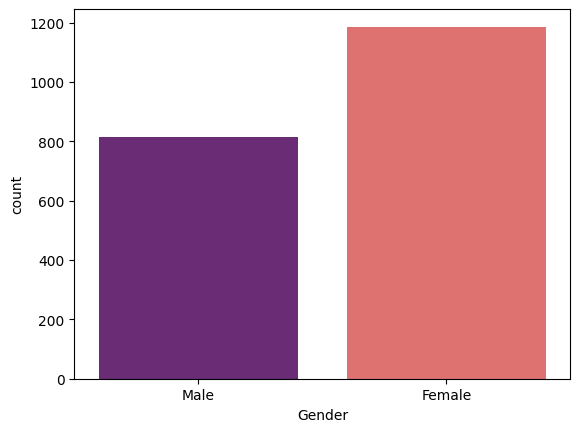

In [15]:
sns.countplot(x=df['Gender'], palette='magma' )
plt.show()

In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

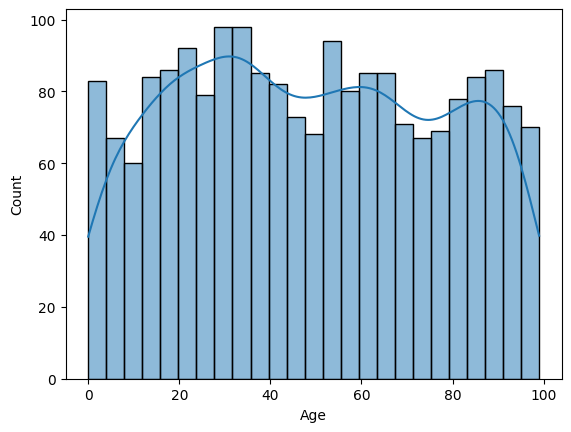

In [17]:
sns.histplot(x=df['Age'], kde=True, bins=25)
plt.show()

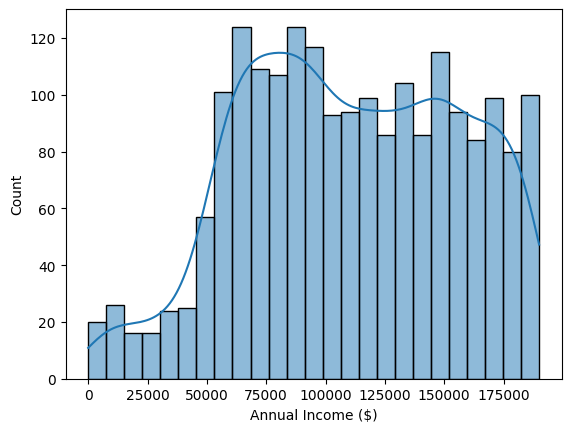

In [18]:
sns.histplot(x=df['Annual Income ($)'], kde=True, bins=25)
plt.show()

<Axes: xlabel='Work Experience', ylabel='Count'>

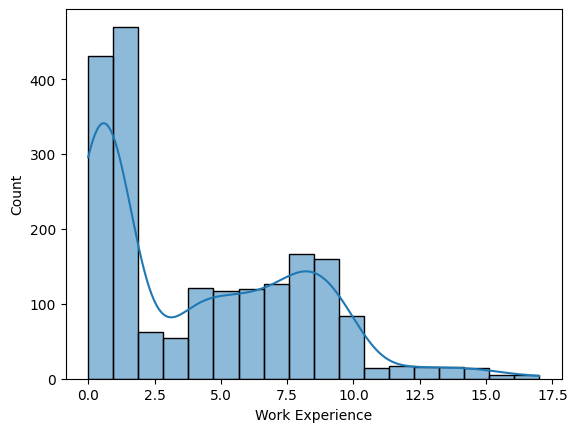

In [19]:
sns.histplot(x=df['Work Experience'],kde=True)

Observation: Work experience column is rightly skewed.
> Most of the people have less than 2 years of experience.

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [21]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features to standardize
numerical_features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df[numerical_features])

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features, index=df.index)



In [22]:
scaled_df.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,-1.054089,-2.093501,-0.428339,-0.791207,0.117497
1,-0.983723,-1.656133,1.075546,-0.281162,-0.390051
2,-1.018906,-0.540845,-1.609962,-0.791207,-1.405148
3,-0.913356,-1.131292,0.932319,-1.046230,-0.897599
4,-0.631891,-1.590528,-0.392532,-0.536185,1.132594


In [23]:
wcss=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit (scaled_df)
  wcss.append(kmeans.inertia_)
  if i>2:
    break

In [24]:
wcss

[10000.00000000001, 8428.519151211149, 7507.63617145032]

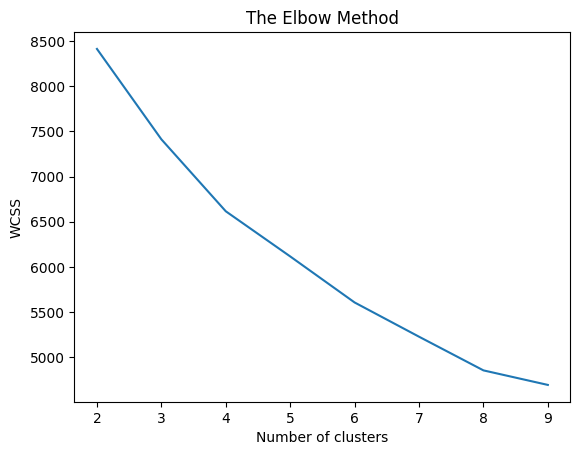

In [29]:
wcss=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit (scaled_df)
  wcss.append(kmeans.inertia_)


plt.plot(range(2,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new=KMeans(8, random_state=42)
clusters_new.fit(scaled_df)

KMeans(random_state=42)

In [31]:
clusters_new.labels_

array([1, 3, 6, ..., 7, 2, 0], dtype=int32)

In [32]:
clusters_new.inertia_

4896.196939116938

In [33]:
df['clusterid_new'] = clusters_new.labels_

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,clusterid_new
0,1,Male,19,15000,39,Healthcare,1,4,1
1,2,Male,21,35000,81,Engineer,3,3,3
2,3,Female,20,86000,6,Engineer,1,1,6
3,4,Female,23,59000,77,Lawyer,0,2,3
4,5,Female,31,38000,40,Entertainment,2,6,1


In [35]:
df.groupby('clusterid_new')['Profession'].value_counts()

clusterid_new  Profession   
0              Artist           94
               Healthcare       52
               Entertainment    39
               Engineer         29
               Executive        22
                                ..
7              Doctor           21
               Executive        19
               Lawyer           17
               Homemaker        11
               Marketing         9
Name: count, Length: 72, dtype: int64

In [36]:
df[df['clusterid_new']==2]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,clusterid_new
303,304,Female,38,148539,7,Healthcare,5,2,2
305,306,Female,65,180243,26,Marketing,6,2,2
306,307,Female,63,165052,12,Artist,4,2,2
318,319,Male,66,182937,44,Marketing,8,1,2
325,326,Male,16,133551,7,Artist,3,1,2
...,...,...,...,...,...,...,...,...,...
1939,1940,Female,76,146308,49,Artist,5,1,2
1953,1954,Female,42,184844,24,Entertainment,6,1,2
1955,1956,Female,11,181026,39,Marketing,6,2,2
1982,1983,Male,33,137094,68,Lawyer,4,1,2


In [37]:
df[df['clusterid_new']==3]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,clusterid_new
1,2,Male,21,35000,81,Engineer,3,3,3
3,4,Female,23,59000,77,Lawyer,0,2,3
5,6,Female,22,58000,76,Artist,0,2,3
7,8,Female,23,84000,94,Healthcare,1,3,3
9,10,Female,30,98000,72,Artist,1,4,3
...,...,...,...,...,...,...,...,...,...
1932,1933,Female,23,59905,79,Artist,7,5,3
1950,1951,Male,42,68765,69,Entertainment,4,1,3
1980,1981,Female,10,86925,76,Artist,7,2,3
1987,1988,Male,63,59244,80,Artist,7,1,3


In [38]:
df['clusterid_new'].value_counts()

,count
clusterid_new,
0,286
3,263
7,253
6,246
2,245
4,243
1,234
5,230


In [39]:
df.groupby('clusterid_new')['Gender'].value_counts()

clusterid_new  Gender
0              Female    174
               Male      112
1              Female    139
               Male       95
2              Female    160
               Male       85
3              Female    150
               Male      113
4              Female    139
               Male      104
5              Female    131
               Male       99
6              Female    148
               Male       98
7              Female    145
               Male      108
Name: count, dtype: int64

**CONCLUSION:**

K-Means clustering successfully segmented shop customers into 7 distinct groups with varying purchase behaviors and demographics. This segmentation provides valuable insights for targeted marketing, improved customer understanding, and data-driven decision-making, ultimately leading to enhanced business performance.